In [3]:
!pip install folium


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [12]:
import pandas as pd

file_path = r"C:\Users\natlo\OneDrive\Desktop\Jupyter Notbook\UFO_Sightings.xlsx"

ufo_data = pd.read_excel(file_path)

print(ufo_data.head())


              datetime                  city state country     shape  \
0  1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1  1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2  1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3  1956-10-10 21:00:00                  edna    tx      us    circle   
4  1960-10-10 20:00:00               kaneohe    hi      us     light   

  duration (seconds) duration (hours/min)  \
0               2700           45 minutes   
1               7200              1-2 hrs   
2                 20           20 seconds   
3                 20             1/2 hour   
4                900           15 minutes   

                                            comments date posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   
1  1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   29.38421   
2  Green/Orange circular disc over Chester&#44 En...   1/21

In [13]:
print(ufo_data.info())

print(ufo_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80331 non-null  object 
 7   comments              80316 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB
None
         longitude 
count  80332.000000
mean     -86.772885
std       39.697205
min     -176.658056
25%     -112.073333
50%      -87.903611
75%      -78.755000
max      1

In [25]:
import pandas as pd

ufo_data['datetime'] = ufo_data['datetime'].astype(str)

ufo_data['datetime'] = ufo_data['datetime'].replace({'24:00': '00:00'}, regex=True)

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

ufo_data['datetime'] = ufo_data['datetime'].where(ufo_data['datetime'].dt.hour != 0,
                                                   ufo_data['datetime'] + pd.Timedelta(days=1))

print(ufo_data['datetime'].head())


0   1949-10-10 20:30:00
1   1949-10-10 21:00:00
2   1955-10-10 17:00:00
3   1956-10-10 21:00:00
4   1960-10-10 20:00:00
Name: datetime, dtype: datetime64[ns]


In [27]:
ufo_data['year'] = ufo_data['datetime'].dt.year
ufo_data['month'] = ufo_data['datetime'].dt.month


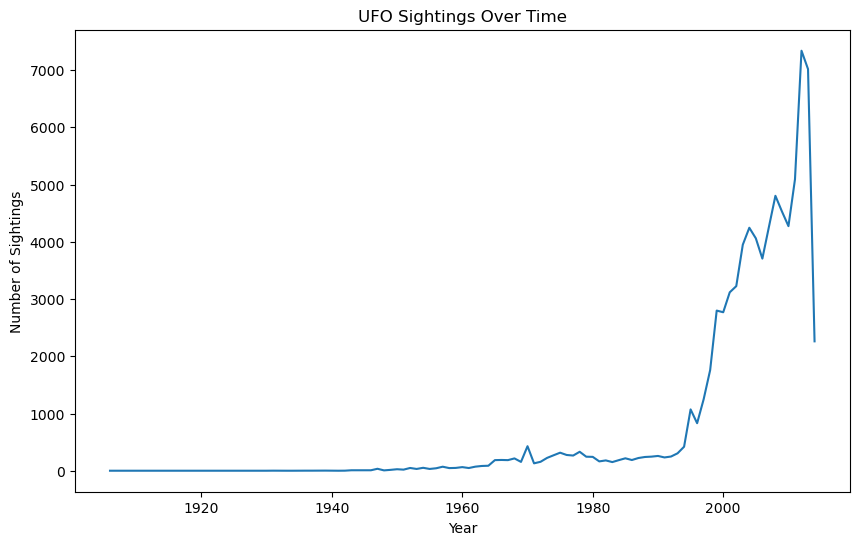

In [29]:
sightings_per_year = ufo_data.groupby('year').size()

sightings_per_year.plot(kind='line', title='UFO Sightings Over Time', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


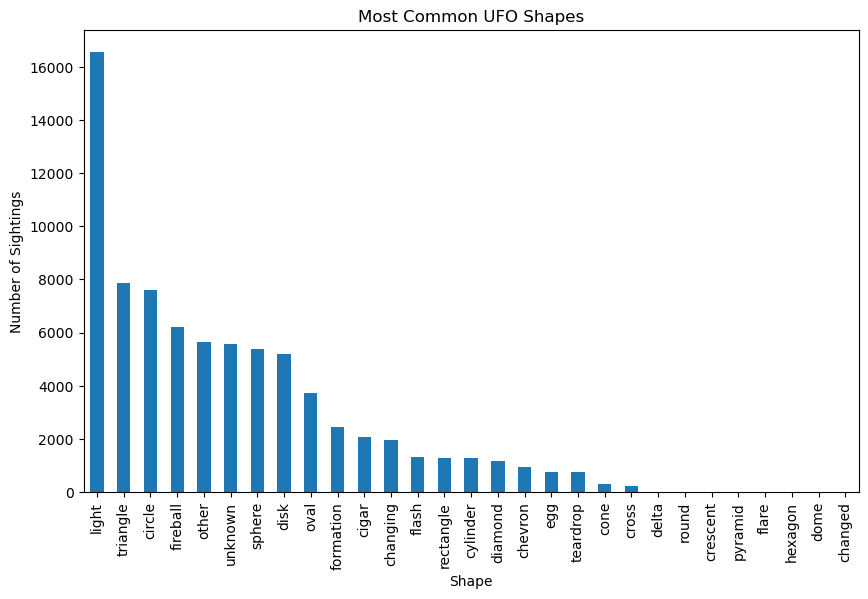

In [31]:
shape_counts = ufo_data['shape'].value_counts()

shape_counts.plot(kind='bar', title='Most Common UFO Shapes', figsize=(10, 6))
plt.xlabel('Shape')
plt.ylabel('Number of Sightings')
plt.show()


In [35]:
print(ufo_data.columns)


Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'year', 'month'],
      dtype='object')


In [37]:
ufo_data.columns = ufo_data.columns.str.strip()

print(ufo_data.columns)


Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude', 'year', 'month'],
      dtype='object')


In [41]:
invalid_latitude = ufo_data[~ufo_data['latitude'].apply(pd.to_numeric, errors='coerce').notna()]
invalid_longitude = ufo_data[~ufo_data['longitude'].apply(pd.to_numeric, errors='coerce').notna()]

print("Invalid Latitude Values:")
print(invalid_latitude[['latitude', 'longitude']].head())

print("Invalid Longitude Values:")
print(invalid_longitude[['latitude', 'longitude']].head())


Invalid Latitude Values:
         latitude   longitude
43782  33q.200088 -105.624152
Invalid Longitude Values:
Empty DataFrame
Columns: [latitude, longitude]
Index: []


In [45]:
ufo_data_clean = ufo_data.dropna(subset=['latitude'])

print(ufo_data_clean[['latitude', 'longitude']].head())


    latitude   longitude
0  29.883056  -97.941111
1  29.384210  -98.581082
2  53.200000   -2.916667
3  28.978333  -96.645833
4  21.418056 -157.803611


In [ ]:
ufo_data.to_csv('Cleaned_UFO_Sightings.csv', index=False)


In [3]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install TextBlob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.7 MB/s eta 0:00:00


In [14]:
print(ufo_data.columns)

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')


In [17]:
ufo_data.columns = ufo_data.columns.str.strip()

print(ufo_data.columns)


Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')


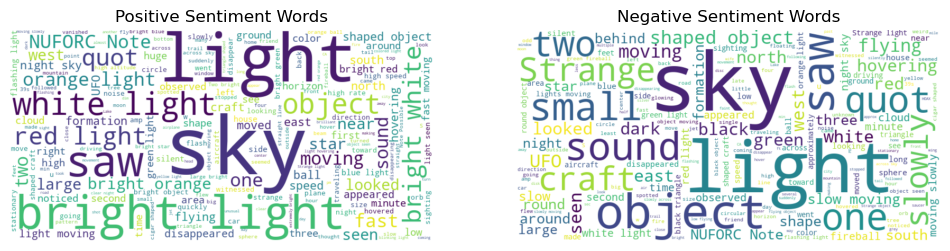

In [19]:
from textblob import TextBlob

ufo_data['sentiment'] = ufo_data['comments'].apply(lambda comment: TextBlob(str(comment)).sentiment.polarity)

positive_comments = ' '.join(ufo_data[ufo_data['sentiment'] > 0]['comments'].dropna())
negative_comments = ' '.join(ufo_data[ufo_data['sentiment'] < 0]['comments'].dropna())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Words')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Words')

plt.show()


In [25]:
print(ufo_data.dtypes)

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
sentiment               float64
dtype: object


In [27]:
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], errors='coerce')

print(ufo_data.dtypes)

invalid_latitudes = ufo_data[ufo_data['latitude'].isnull()]
print("Invalid Latitude Values:", invalid_latitudes)

ufo_data.dropna(subset=['latitude', 'datetime'], inplace=True)

print(ufo_data.head())


datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                       float64
longitude                      float64
sentiment                      float64
dtype: object
Invalid Latitude Values:                  datetime                          city state country  \
43782 1974-05-22 05:30:00  mescalero indian reservation    nm     NaN   

           shape duration (seconds) duration (hours/min)  \
43782  rectangle                180            two hours   

                                                comments date posted  \
43782  Huge rectangular object emmitting intense whit...   4/18/2012   

       latitude   longitude  sentiment  
43782       NaN -105.624152       0.22 